# LAB 3

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from mayavi import mlab
from pdffuns import norm2D, plot_3d, plot_regions, parzen, knn, plot_knn
from matplotlib import pyplot as plt
from matplotlib import cm

In [3]:
mlab.init_notebook('x3d', 800, 500)
plt.rcParams['figure.figsize'] = (14, 14)

Notebook initialized with x3d backend.


---

## Scaled probability density functions

We first load the data samples from a file.

In [4]:
samples_1, samples_2 = np.load('lab3.p', allow_pickle=True)

We then estimate $\mu$ and $\Sigma$ for each class.

In [5]:
mu_1 = samples_1.mean(axis=1).reshape(-1, 1)
mu_2 = samples_2.mean(axis=1).reshape(-1, 1)

sigma_1 = np.cov(samples_1)
sigma_2 = np.cov(samples_2)

We can now compute the probability density functions over the the domain $x_1 \in [-10, 10]$ and $x_2 \in [-10, 10]$

In [6]:
dist_1 = norm2D(mu_1, sigma_1)
dist_2 = norm2D(mu_2, sigma_2)

To display the scaled probability density functions, we use the prior probabilities as weights for the previously computed distributions.

In [7]:
n_samples_total = samples_1.size + samples_2.size
w_1 = samples_1.size/n_samples_total
w_2 = samples_2.size/n_samples_total

w_dist_1 = [*dist_1[:2], w_1*dist_1[2]]
w_dist_2 = [*dist_2[:2], w_2*dist_2[2]]

In [8]:
plot_3d(w_dist_1[2], w_dist_2[2], 'wpdf.png')

![](wpdf.png)

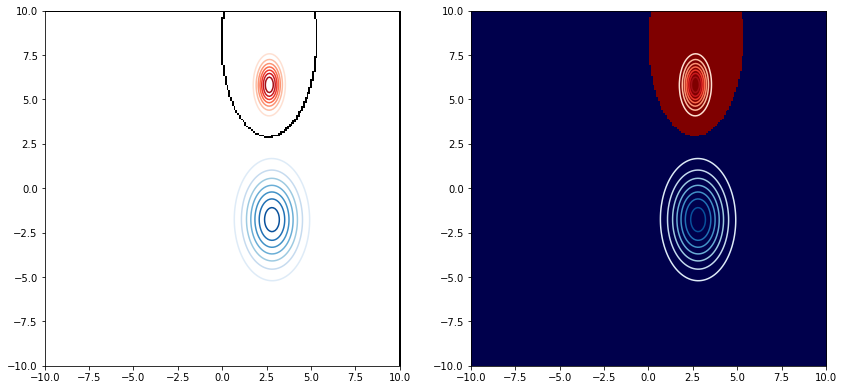

In [9]:
plot_regions(w_dist_1, w_dist_2)

In this case, the decision boundary is an ellipse. We can note that in this case (ellipse), in lab 2 (parabola) and in exercise 3 (hyperbola), decision boundaries are conic sections.

## Parzen classifier

We are now going to estimate the underlying distributions with non-parametric techniques. The first one is a parzen classifier with a gaussian kernel.

In [10]:
dist1_parzen = parzen(samples_1.T, h1=0.5)
dist2_parzen = parzen(samples_2.T, h1=0.5)

plot_3d(dist1_parzen[2], dist2_parzen[2], 'parzen_3d_half.png', scale=4e2)

![](parzen_3d_half.png)

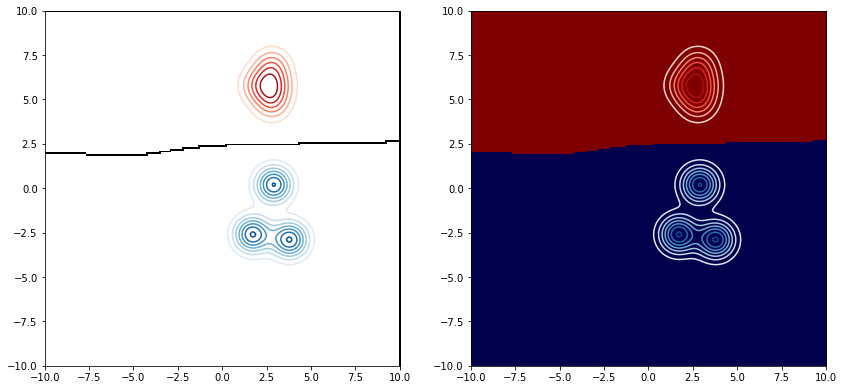

In [11]:
plot_regions(dist1_parzen, dist2_parzen)

In [12]:
dist1_parzen = parzen(samples_1.T, h1=5)
dist2_parzen = parzen(samples_2.T, h1=5)
plot_3d(dist1_parzen[2], dist2_parzen[2], 'parzen_3d_5.png', scale=2e3)

![](parzen_3d_5.png)

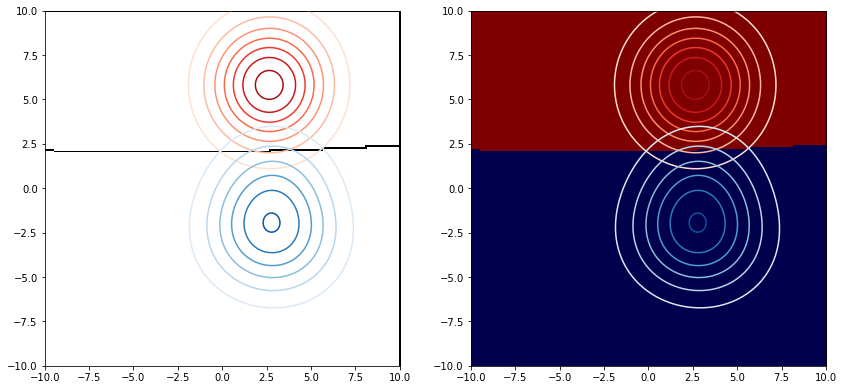

In [13]:
plot_regions(dist1_parzen, dist2_parzen)

We see that in the first case, $h_1=0.5$ seems to be a too tight window to accurately describe the underlying distribution. In the second case however, $h_1=5$ seems to be a an appropriate window size. We can deduct that the kernel parameters play an important role when building a Parzen classifier.

## k-nearest neighbors

Another non-parametric technique in the k-nearest neighbour classifier. We display its decision boundary and decision regions for $k=1, 3$ and show why it doesn't work for $k=5$.

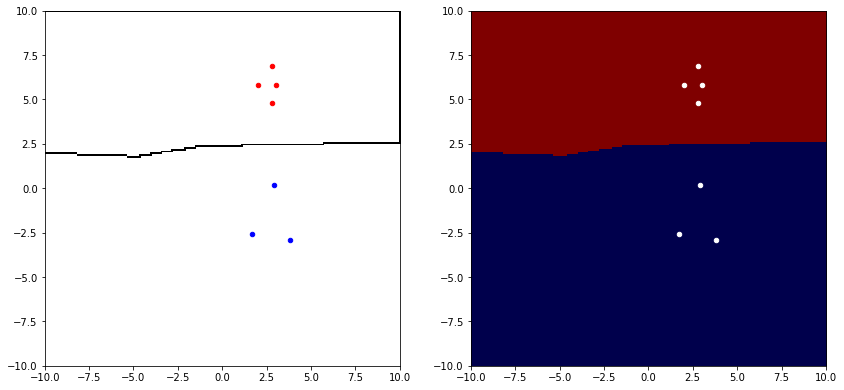

In [14]:
knn_regions = knn(samples_1.T, samples_2.T, 1)

plot_knn(samples_1, samples_2, knn_regions)

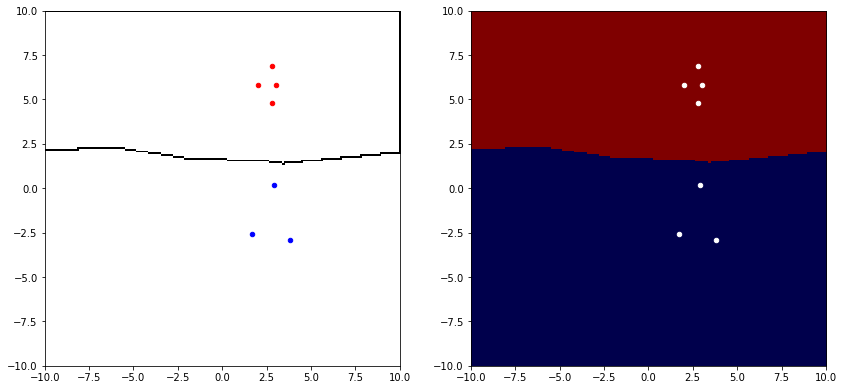

In [15]:
knn_regions = knn(samples_1.T, samples_2.T, 3)

plot_knn(samples_1, samples_2, knn_regions)

In [16]:
knn_regions = knn(samples_1.T, samples_2.T, 5)

plot_knn(samples_1, samples_2, knn_regions)

ValueError: min() arg is an empty sequence

In this case, there is not enough data samples in one of the classes to properly compute the decision boundary. When all data points from a certain class are identified as closest neighbors, there is no remaining sample from this class to compare the distance with the other class. We can deduce that $k$ should be chosen to be at most the number of samples from the least represented class.